- Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

- With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

- <a>http://www.amstat.org/publications/jse/v19n3/decock.pdf</a>  
- Criteria: log of rmse

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# show all df columns
pd.set_option('display.max_columns', None)
%matplotlib inline

# Helps to reload .py functions when edited
%load_ext autoreload
%autoreload 2

Refer to [HousePricePrediction-DataPreprocessing.ipynb](./HousePricePrediction-DataPreprocessing.ipynb) for pre-processing.

In [2]:
# Restore already processed file
df_train = pd.read_pickle("data/house-train.pkl")
df_test = pd.read_pickle("data/house-test.pkl")
df_target = pd.read_pickle("data/house-train-target.pkl")

In [3]:
df_train.head(10).T

Id,1,2,3,4,5,6,7,8,9,10
MSSubClass,60.0,20.0,60.0,70.0,60.0,50.0,20.0,60.0,50.0,190.0
MSZoning,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,0.0,51.0,50.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.0,6120.0,7420.0
Street,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Alley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
LotShape,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,3.0
LandContour,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Utilities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LotConfig,4.0,2.0,4.0,0.0,2.0,4.0,4.0,0.0,4.0,0.0


In [4]:
df_test.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
Id                                                                          
1461          20         2         80.0    11622       2      1         3   
1462          20         3         81.0    14267       2      1         0   
1463          60         3         74.0    13830       2      1         0   
1464          60         3         78.0     9978       2      1         0   
1465         120         3         43.0     5005       2      1         0   

      LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
Id                                                                             
1461            3          0          4          0            12           1   
1462            3          0          0          0            12           2   
1463            3          0          4          0             8           2   
1464            3          0          4          0             8           2   
1465            1          0          4          0            22           2   

      Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                            
1461           2         0           2            5            6       1961   
1462           2         0           2            6            6       1958   
1463           2         0           5            5            5       1997   
1464           2         0           5            6            6       1998   
1465           2         4           2            8            5       1992   

      YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
Id                                                                              
1461          1961          1         0           13           13           2   
1462          1958          3         0           14           14           1   
1463          1998          1         0           13           13           2   
1464          1998          1         0           13           13           1   
1465          1992          1         0            6            6           2   

      MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
Id                                                                       
1461         0.0          3          4           1         4         4   
1462       108.0          3          4           1         4         4   
1463         0.0          3          4           2         2         4   
1464        20.0          3          4           2         4         4   
1465         0.0          2          4           2         2         4   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
Id                                                                       
1461             3             3       468.0             2       144.0   
1462             3             5       923.0             1         0.0   
1463             3             6       791.0             1         0.0   
1464             3             6       602.0             1         0.0   
1465             3             5       263.0             1         0.0   

      BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
Id                                                                         
1461      270.0        882.0        1          4           1           4   
1462      406.0       1329.0        1          4           1           4   
1463      137.0        928.0        1          2           1           4   
1464      324.0        926.0        1          0           1           4   
1465     1017.0       1280.0        1          0           1           4   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                              
1461       896         0             0        896 

In [5]:
#Define criteria
import math
from sklearn.metrics import r2_score

def rmse(y, y_pred): return math.sqrt(((y-y_pred)**2).mean())


def print_score(m):
    y_bar = m.predict(X)
    res = [rmse(y_bar, y), r2_score(y_bar.reshape(-1,1), y.values.reshape(-1,1))]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [6]:
# This is the log of sales price. Has to be converted back after prediction.
df_target.head()

Id
1    12.247694
2    12.109011
3    12.317167
4    11.849398
5    12.429216
Name: SalePrice, dtype: float64

In [7]:
print("Training Set Shape:", df_train.shape)
print("Test Set Shape:", df_test.shape)

Training Set Shape: (1458, 1637)
Test Set Shape: (1459, 1637)


## Feature Selection

In [8]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import RandomForestRegressor

X = df_train.copy()
y = df_target

In [9]:
rf3 = RandomForestRegressor(random_state = 0, 
                           bootstrap =  True, 
                           max_features = 0.5,
                           min_samples_leaf=3,
                           n_estimators = 100,
                           oob_score = True,
                            n_jobs = -1
                            )

rf3.fit(X, y)
print_score(rf3)

[0.06102868655058587, 0.9743397103403899, 0.895956045203989]


In [10]:
rf4 = RandomForestRegressor(random_state = 0, 
                           bootstrap =  True, 
                           max_features = 0.5,
                           min_samples_leaf=3,
                           n_estimators = 150,
                           oob_score = True,
                            n_jobs = -1
                            )

rf4.fit(X, y)
print_score(rf4)

[0.06088127278985695, 0.9744315475750727, 0.8969272291213746]


In [11]:
rf5 = RandomForestRegressor(random_state = 0, 
                           bootstrap =  True, 
                           max_features = 0.5,
                           min_samples_leaf=3,
                           n_estimators = 200,
                           oob_score = True,
                            n_jobs = -1
                            )

rf5.fit(X, y)
print_score(rf5)

[0.06036979936181446, 0.9748973341750363, 0.897817293215963]


In [12]:
rf6 = RandomForestRegressor(random_state=0, 
                           bootstrap=True, 
                           max_features=0.5,
                           min_samples_leaf=3,
                           n_estimators=400,
                           oob_score=True,
                            n_jobs=-1
                            )

rf6.fit(X, y)
print_score(rf6)

[0.059995626943761246, 0.9752470011636056, 0.8991669764976448]


In [13]:
#Values may differ in each run
#[0.060371718635554704, 0.9749142040035622, 0.8981641097502314] 200
#[0.0601810614951213, 0.97507756307215, 0.8985889165241548] 300
#[0.0601787440114048, 0.9750761836176175, 0.8988089678160671] 350
#[0.0599956269437611, 0.9752470011636057, 0.8991669764976448] 400 best score yet

## Feature Selection

In [14]:
feature_importance = pd.DataFrame({"Features": df_train.columns,
              "FeatureImportance": rf3.feature_importances_}
              )
ft = feature_importance.sort_values(by="FeatureImportance", ascending = False)
ft[0:40]

,Features,FeatureImportance
353,OverallQual_TotalSF,0.378169
1601,TotalSF_SimplOverallQual,0.164802
325,OverallQual_GrLivArea,0.044411
1328,GarageCars_TotalSF,0.036761
312,OverallQual_YearBuilt,0.024126
335,OverallQual_GarageYrBlt,0.018073
1397,GarageCond_TotalSF,0.017999
403,OverallCond_TotalSF,0.015544
999,GrLivArea_SimplOverallQual,0.015329
848,CentralAir_TotalSF,0.010726


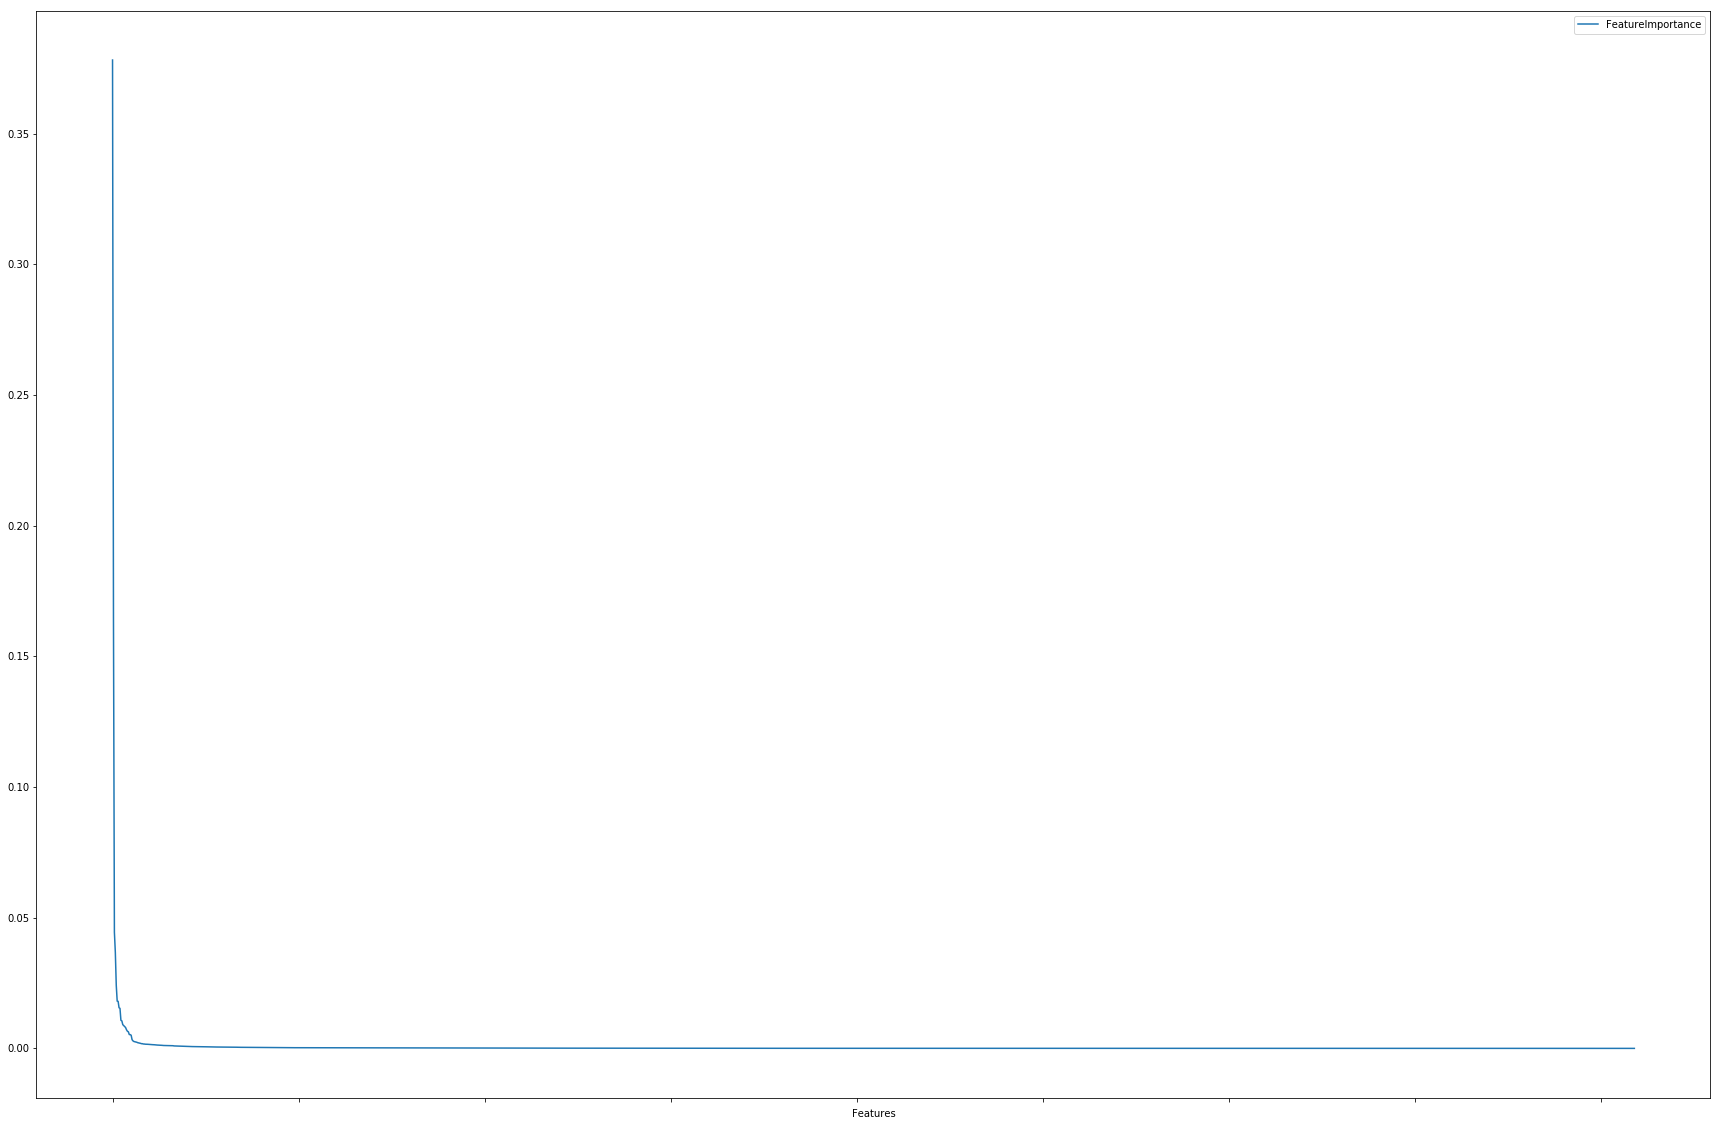

In [15]:
#Feature importance plot
ft.plot(x="Features", y ="FeatureImportance", kind="line", figsize=(30,20))

In [16]:
col = list(ft["Features"][0:40])

df_keep = df_train.loc[:, col]

Removing Redundant Features using Dendogram

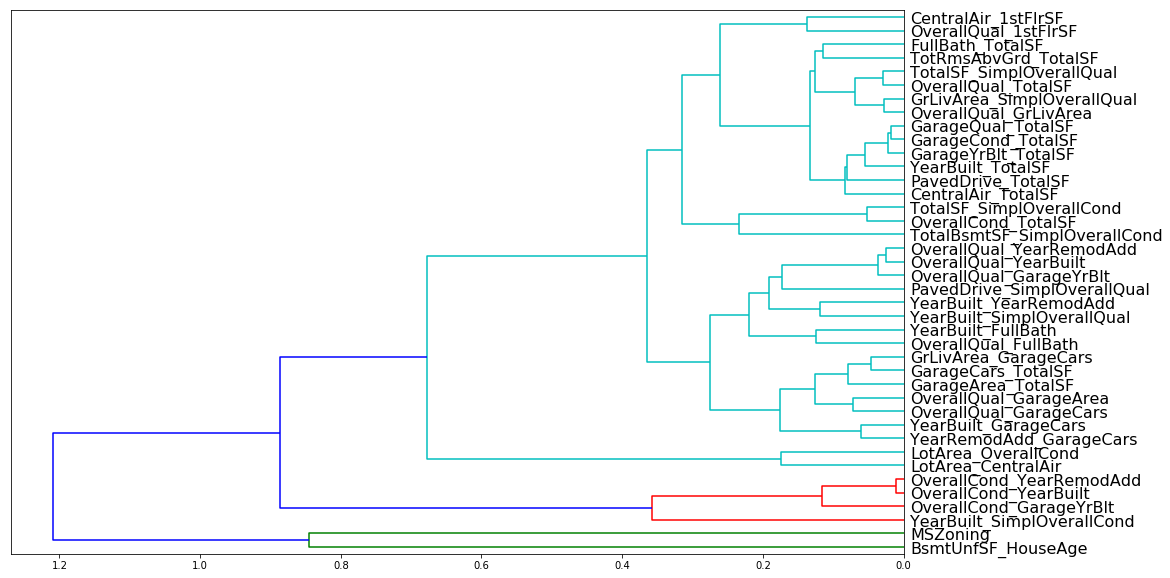

In [17]:
import scipy
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, 
      orientation='left', leaf_font_size=16)
plt.show()

In [18]:
#Remove similar features one at a time and compare oob score
def get_oob(df):
    X = df_keep.copy()
    m = RandomForestRegressor(n_estimators=300, min_samples_leaf=3, 
           max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X, y)
    return m.oob_score_

In [19]:
get_oob(df_keep)

0.8915609623765077

In [21]:
df_keep.columns

Index(['OverallQual_TotalSF', 'TotalSF_SimplOverallQual',
       'OverallQual_GrLivArea', 'GarageCars_TotalSF', 'OverallQual_YearBuilt',
       'OverallQual_GarageYrBlt', 'GarageCond_TotalSF', 'OverallCond_TotalSF',
       'GrLivArea_SimplOverallQual', 'CentralAir_TotalSF',
       'YearBuilt_SimplOverallQual', 'GarageQual_TotalSF',
       'TotalSF_SimplOverallCond', 'GrLivArea_GarageCars',
       'GarageYrBlt_TotalSF', 'GarageArea_TotalSF', 'OverallQual_1stFlrSF',
       'YearBuilt_TotalSF', 'OverallQual_FullBath', 'PavedDrive_TotalSF',
       'PavedDrive_SimplOverallQual', 'YearBuilt_SimplOverallCond',
       'YearRemodAdd_GarageCars', 'OverallCond_YearBuilt',
       'OverallCond_GarageYrBlt', 'YearBuilt_GarageCars',
       'TotRmsAbvGrd_TotalSF', 'OverallQual_GarageCars',
       'OverallQual_GarageArea', 'OverallQual_YearRemodAdd',
       'CentralAir_1stFlrSF', 'LotArea_CentralAir', 'YearBuilt_FullBath',
       'TotalBsmtSF_SimplOverallCond', 'BsmtUnfSF_HouseAge',
       'FullBath_To

## Modelling

In [22]:
test_label = rf6.predict(df_test)

## Sumission

In [23]:
from submission import submit

In [25]:
submit(test_label, df_test)

Fist 10 predictions: [122414.67219762738, 152564.70249170082, 177549.77313170134, 185081.92675976595, 190706.60362163084, 179107.9360099238, 171472.2589065731, 174027.4895772863, 183973.8655867036, 120442.2552268486]
Save path : submissions/submission_test.csv
